<a href="https://colab.research.google.com/github/LZY199/PracticalAI/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Generate Data**

In [510]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SEED = 1234
NUM_SAMPLES = 50

# Set seend for reproducibility
np.random.seed(SEED)

# Generate synthetic data
def generate_data(num_samples):
  """Generate dummy data for linear regression."""
  X = np.array(range(num_samples))
  noise = np.random.uniform(-10, 20, size=num_samples)
  y = 3.5*X + noise
  return X, y

# Generate randome(linear data)
X,y = generate_data(NUM_SAMPLES)
data = np.vstack((X,y)).T
print(data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [511]:
# Load into a Pandas DataFrame
df = pd.DataFrame(data, columns=['X', 'y'])
X = df[['X']].values
y = df[['y']].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


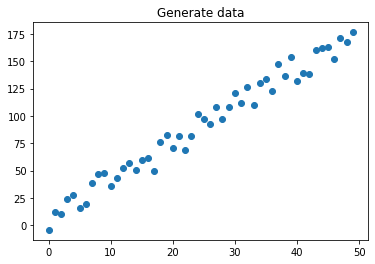

In [512]:
# Scatter Plot
plt.title("Generate data")
plt.scatter(x=df['X'], y=df['y'])
plt.show()

## **Numpy**
Data is already prepared. Going to first implement linear regression using just Numpy.  

## **Split Data**
Split dataset into three sets: train, validation and test data splits.


*   train: used to train model.
*   val: used to validate our model's performance during training.
*   test: used to do an evaluation of our fully trained model.





In [513]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

# Shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Split indices
train_start = 0
train_end = int(TRAIN_SIZE * NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE + VAL_SIZE)* NUM_SAMPLES)
test_start = val_end

# Split Data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]

print(f"X_train:{X_train.shape}, y_train:{y_train.shape}")
print(f"X_val:{X_val.shape}, y_val:{y_val.shape}")
print(f"X_test:{X_test.shape}, y_test:{y_test.shape}")

X_train:(35, 1), y_train:(35, 1)
X_val:(7, 1), y_val:(7, 1)
X_test:(8, 1), y_test:(8, 1)


## **Standardize data**

In [514]:
def standardize_data(data, mean, std):
  return (data-mean)/std

# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

print("X_mean:", X_mean)
print("X_std:", X_std)
print("y_mean:", y_mean)
print("y_std:", y_std)

X_mean: 27.0
X_std: 14.863185584331701
y_mean: 100.23554348153554
y_std: 51.625594778672756


Need to treat the validation and test sets as if they were hidden datasets. So only use the train set to determine the mean and std to avoid biasing our training process.

In [515]:
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

# Check (mean should be about 0 and std shoulb be about 1)
print("X_test:", X_test)
print(f"mean:{np.mean(X_test, axis=0)[0]:.1f}, std:{np.std(X_test, axis=0)[0]:.1f}")
print(f"mean:{np.mean(y_test, axis=0)[0]:.1f}, std:{np.std(y_test, axis=0)[0]:.1f}")


X_test: [[-1.14376557]
 [ 0.4709623 ]
 [-0.80736393]
 [-1.48016721]
 [-1.61472787]
 [ 0.60552295]
 [-1.34560656]
 [ 0.74008361]]
mean:-0.6, std:0.9
mean:-0.6, std:0.9


## **Weight**
The goal is to learn a linear model y that models y given X usingweights W and bias b -> y = XW+b

step 1: Randomly initialize the model's weights W

In [516]:
INPUT_DIM = X_train.shape[1] # X is 1-dimenstional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [517]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))
print(f"W:{W.shape}")
print(f"b:{b.shape}")

W:(1, 1)
b:(1, 1)


## **Model**

step 2: Feed inputs X into the model to receive the predictions y

In [518]:
# Forward pass[Nx1]*[1x1] = [Nx1]
y_pred = np.dot(X_train, W) + b
print(f"y_pred:{y_pred.shape}")

y_pred:(35, 1)


## **Loss**
step 3: Compare the predictions y' with the actual target values y using the objective(cost) function to determine the loss J. A common objective function for linear regression is mean squared error(MSE). This function calculates the difference between the prediction and target values and squares it.

In [519]:
# Loss
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print(f"loss:{loss:.2f}")

loss:0.99


## **Gradients**
step 4: Calculate the gradient of loss J w.r.t to the model weights.

In [520]:
# Backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

Gradient is the derivative, or the rate of change of a function. It's a vector that points in the direction of greatest increase of a function. We want to minimize the loss function, so we need to subtract the gradient from W and b. 

## **Update weights**
step 5: Update the weights W using a small learing rate a.


In [521]:
LEARNING_RATE = 1e-1
# Update weights
W += -LEARNING_RATE*dW
b += -LEARNING_RATE*db

## **Training**
step 6: Repeat steps 2 -> 5 to minimize the loss and train the model

In [522]:
NUM_EPOCHS = 100
# Randomly initialize weight W and bias b
W = 0.01*np.random.randn(INPUT_DIM,OUTPUT_DIM)
b = np.zeros((1,1))

# Training Loop
for epoch_num in range(NUM_EPOCHS):
  # models
  y_pred = np.dot(X_train, W) + b
  
  # Loss function
  loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)

  # Show progress
  if epoch_num%10 == 0:
    print(f"Epoch: {epoch_num}, loss:{loss:.3f}")

  # gradients
  dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
  db = -(2/N) * np.sum((y_train - y_pred) * 1)

  # Update weight and bias
  W += -LEARNING_RATE * dW
  b += -LEARNING_RATE * db



Epoch: 0, loss:0.990
Epoch: 10, loss:0.039
Epoch: 20, loss:0.028
Epoch: 30, loss:0.028
Epoch: 40, loss:0.028
Epoch: 50, loss:0.028
Epoch: 60, loss:0.028
Epoch: 70, loss:0.028
Epoch: 80, loss:0.028
Epoch: 90, loss:0.028


## **Evaluation**
Now to see how well the trained model will perform on test data split. This will be our best measure on how well the model would perform on the real world, given that our dataset's distribution is close to unseen data. 

In [523]:
# predictions
pred_train = W * X_train + b
pred_test = W * X_test + b

# Train and test MSE
train_mse = np.mean((y_train - pred_train)**2)
test_mse = np.mean((y_test - pred_test)**2)
print(f"train_MSE:{train_mse:.2f}, test_MSE:{test_mse:.2f}")

train_MSE:0.03, test_MSE:0.01


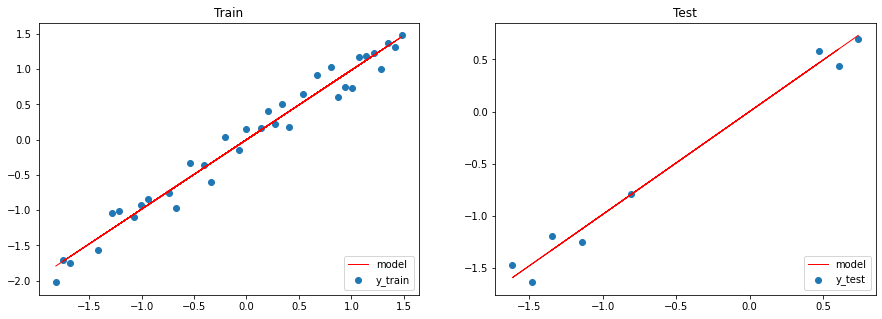

In [524]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-' , label='model')
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test, color='red', linewidth=1, linestyle='-' , label='model')
plt.legend(loc='lower right')

## **Interpretability**
Since the input and output are standardized, weights were fit to those standardized values. So need to unstandardize weightt. Then be able to compare it to the true weight(3.5).

In [525]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - W_unscaled * X_mean
print("[actual] y = 3.5x + noise")
print(f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0][0]:.1f}")

[actual] y = 3.5x + noise
[model] y_hat = 3.4X + 7.8


## **PyTorch**
Implement linear regression with PyTorch.

In [526]:
import torch
# set seed for reproducibility
torch.manual_seed(SEED)

## **Split Data**
Instead of splitting data using indices, let's use scikit-learn's built in train_test_split function.

In [527]:
from sklearn.model_selection import train_test_split
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

# Split (train)
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE)
print(f"train: {len(X_train)}({len(X_train)/len(X)})")
print(f"train: {len(X_)}({len(X_)/len(X)})")

train: 35(0.7)
train: 15(0.3)


In [528]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5)
print(f"train: {len(X_train)}({len(X_train)/len(X)})")
print(f"val: {len(X_val)}({len(X_val)/len(X)})")
print(f"test: {len(X_test)}({len(X_test)/len(X)})")

train: 35(0.7)
val: 7(0.14)
test: 8(0.16)


## **Standardize data**
use scikit-learn's StandarScaler to standardize our data.

In [529]:
from sklearn.preprocessing import StandardScaler
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train = X_scaler.transform(X_train)
y_train = y_scaler.transform(y_train).ravel().reshape(-1,1)
X_val  = X_scaler.transform(X_val)
y_val  = y_scaler.transform(y_val).ravel().reshape(-1,1)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test).ravel().reshape(-1,1)

In [530]:
# Check (means should be 0 and std should be 1)
print(f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print(f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.5, std: 0.8
mean: -0.5, std: 0.8


## **Weight**
Use PyTorch's Linear layers in our MLP implementation. These layers will act as out weights(and biases).

In [531]:
from torch import nn
# Inputs
N = 3 # num samples
x = torch.rand(N, INPUT_DIM)
print(x.shape)
print(x.numpy())

torch.Size([3, 1])
[[0.02897924]
 [0.40189856]
 [0.25984418]]


In [532]:
# Weights
m = nn.Linear(INPUT_DIM, OUTPUT_DIM)
print(m)
print(f"weight: ({m.weight.shape}):{m.weight[0][0]}")
print(f"bias: ({m.bias.shape}):{m.bias[0]}")

Linear(in_features=1, out_features=1, bias=True)
weight: (torch.Size([1, 1])):-0.2667173147201538
bias: (torch.Size([1])):-0.8833985328674316


In [533]:
# Forward pass
z = m(x)
print(z.shape)
print(z.detach().numpy())

torch.Size([3, 1])
[[-0.8911278]
 [-0.9905918]
 [-0.9527035]]


## **Model**
y = XW + b

In [534]:
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.fc1 = nn.Linear(input_dim, output_dim)

  def forward(self, x_in):
    y_pred = self.fc1(x_in)
    return y_pred


In [535]:
#Initialize Model
model = LinearRegression(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)
print(model.parameters)

<bound method Module.parameters of LinearRegression(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


## **Loss**
Use PyTorch's loss functions, specifically MSELoss


In [536]:
loss_fn = nn.MSELoss()
#y_pred = torch.Tensor([0,0,1,1])
#y_true = torch.Tensor([1,1,1,0])
#print(y_pred)
#print(y_true)
#loss = loss_fn(y_pred, y_true)
#print('loss: ', loss.numpy())

## **Optimizer**
When implemented linear regression with just Numpy, we used batch gradient descent to update weights. But here are actually many different gradient descent optimization algorithms to choose from and it depends on the situation. However, the ADAM optimizer has become a standard algorithm for most cases.

In [537]:
from torch.optim import Adam
#Optimizer
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)

## **Training**

In [538]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

Inside the training loop, optimization happens in three steps:
1. Call optimizer.zero_grad() to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
2. Backpropagate the prediction loss with a call to loss.backwards(). PyTorch deposits the gradients of the loss w.r.t. each parameter.
3. Once we have our gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass.

In [539]:
# Trianing
for epoch in range(NUM_EPOCHS):
  # Forward pass
  y_pred = model(X_train)

  # Loss
  loss = loss_fn(y_pred, y_train)

  # Zero all gradients
  optimizer.zero_grad()

 # Backward pass
  loss.backward()
  
  # Update weights
  optimizer.step()

  if epoch%20 == 0:
    print(f"Epoch: {epoch} | loss: {loss:.2f}")


Epoch: 0 | loss: 1.17
Epoch: 20 | loss: 0.08
Epoch: 40 | loss: 0.03
Epoch: 60 | loss: 0.02
Epoch: 80 | loss: 0.02


## **Evaluation**
Now ready to evaluate the trained model

In [540]:
# Predictions
pred_train = model(X_train)
pred_test = model(X_test)

# Performance
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)
print(f"train_error:{train_error:.2f}")
print(f"test_error:{test_error:.2f}")

train_error:0.02
test_error:0.01


since only have one festure, it's easy to visually inspect the model

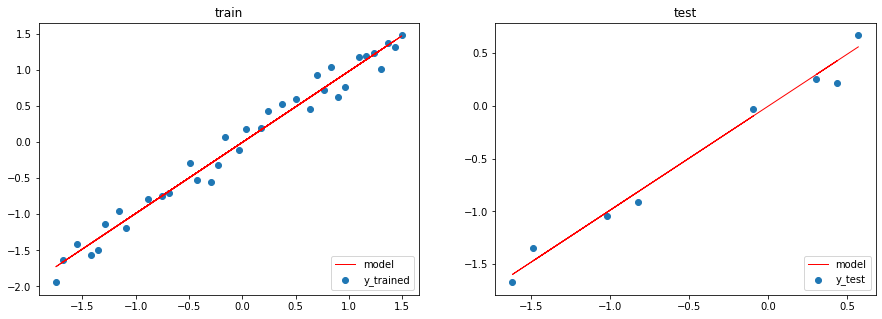

In [543]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1,2,1)
plt.title("train")
plt.scatter(X_train, y_train, label = "y_trained")
plt.plot(X_train, pred_train.detach().numpy(), color="red", linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1,2,2)
plt.title("test")
plt.scatter(X_test, y_test, label = "y_test")
plt.plot(X_test, pred_test.detach().numpy(), color="red", linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# Show plots
plt.show()

## **Inference**
After training a model, we can use it to predict on new data
 

In [544]:
# Feed in own input
sample_indices = [10, 15, 20]
X_infer = np.array(sample_indices, dtype=np.float32)
X_infer = torch.Tensor(X_scaler.transform(X_infer.reshape(-1,1)))

Unstandardize predictions

In [545]:
pred_infer = model(X_infer).detach().numpy()*np.sqrt(y_scaler.var_) + y_scaler.mean_
for i, index in enumerate(sample_indices):
  print(f"{df.iloc[index]['y']:.2f}(actual) -> {pred_infer[i][0]:.2f}(predicted)")

35.73(actual) -> 41.71(predicted)
59.34(actual) -> 58.94(predicted)
70.95(actual) -> 76.17(predicted)


## **Interpretability**
Linear regression offers the great advantage of being highly interpretable. Each feature has a coefficient which signifies its importance/impact on the output variable y. We can interpret our coefficient as follows: by increasing X by 1 unit, we increate y  by W(-3.65) units


In [547]:
# Unstandardize coefficients
W = model.fc1.weight.data.numpy()[0][0]
b = model.fc1.bias.data.numpy()[0]
W_unscaled = W * (y_scaler.scale_/X_scaler.scale_)
b_unscaled = b * y_scaler.scale_ + y_scaler.mean_ - np.sum(W_unscaled * X_scaler.mean_)
print("[acutal] y = 3.5X + noise")
print(f"[model]y_hat = {W_unscaled[0]:.1f}X + {b_unscaled[0]:.1f}")

[acutal] y = 3.5X + noise
[model]y_hat = 3.4X + 7.2
